<a href="https://colab.research.google.com/github/Kwasi-Dankwa/farming-yield-project/blob/main/Smart_Farm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model Building with Machine Learning

In [2]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


In [3]:
# Loading data
df = pd.read_csv("/content/Smart_Farming_Crop_Yield_2024.csv")
df.head()

,farm_id,region,crop_type,soil_moisture_%,soil_pH,temperature_C,rainfall_mm,humidity_%,sunlight_hours,irrigation_type,...,sowing_date,harvest_date,total_days,yield_kg_per_hectare,sensor_id,timestamp,latitude,longitude,NDVI_index,crop_disease_status
0,FARM0001,North India,Wheat,35.95,5.99,17.79,75.62,77.03,7.27,NaN,...,2024-01-08,2024-05-09,122,4408.07,SENS0001,2024-03-19,14.970941,82.997689,0.63,Mild
1,FARM0002,South USA,Soybean,19.74,7.24,30.18,89.91,61.13,5.67,Sprinkler,...,2024-02-04,2024-05-26,112,5389.98,SENS0002,2024-04-21,16.613022,70.869009,0.58,NaN
2,FARM0003,South USA,Wheat,29.32,7.16,27.37,265.43,68.87,8.23,Drip,...,2024-02-03,2024-06-26,144,2931.16,SENS0003,2024-02-28,19.503156,79.068206,0.80,Mild
3,FARM0004,Central USA,Maize,17.33,6.03,33.73,212.01,70.46,5.03,Sprinkler,...,2024-02-21,2024-07-04,134,4227.80,SENS0004,2024-05-14,31.071298,85.519998,0.44,NaN
4,FARM0005,Central USA,Cotton,19.37,5.92,33.86,269.09,55.73,7.93,NaN,...,2024-02-05,2024-05-20,105,4979.96,SENS0005,2024-04-13,16.568540,81.691720,0.84,Severe


Columns with null values

In [22]:
df.isnull().sum()
df.describe()

#removing unecessary columns for analysis
df.drop(columns=['farm_id', 'region', 'sowing_date', 'harvest_date', 'timestamp', 'sensor_id'], axis=1, inplace=True)

Machine Learning Process- Encoding Categorical Data

In [23]:
encoder  = LabelEncoder()
for i in ['crop_type', 'irrigation_type', 'fertilizer_type', 'crop_disease_status']:
    df[i] = encoder.fit_transform(df[i])

Importing ML modules

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

Train Data and Scale Data

In [26]:
# train data
# remove the target variable as well as farm_id
X = df.drop(['yield_kg_per_hectare'], axis=1) # Pass column names as a list to 'labels'
y = df['yield_kg_per_hectare'] #store target variable in y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# Scale Data
scaler = StandardScaler()
scaler.fit(X_train, X_test)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


(400, 15)
(400,)
(100, 15)
(100,)


Models


In [27]:
# Dictionary of models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'KNN': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor()
}

Linear Regression:
R² Score: -0.0556
MSE: 1457785.46

Ridge Regression:
R² Score: -0.0546
MSE: 1456519.12

Lasso Regression:
R² Score: -0.0541
MSE: 1455756.44

Random Forest:
R² Score: -0.0486
MSE: 1448144.37

Gradient Boosting:
R² Score: -0.1266
MSE: 1555865.67

KNN:
R² Score: -0.1693
MSE: 1614884.98

Decision Tree:
R² Score: -1.5211
MSE: 3481810.04



<ipython-input-32-c154d0ba04b2>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R² Score', y='Model', data=results_df, palette='viridis')


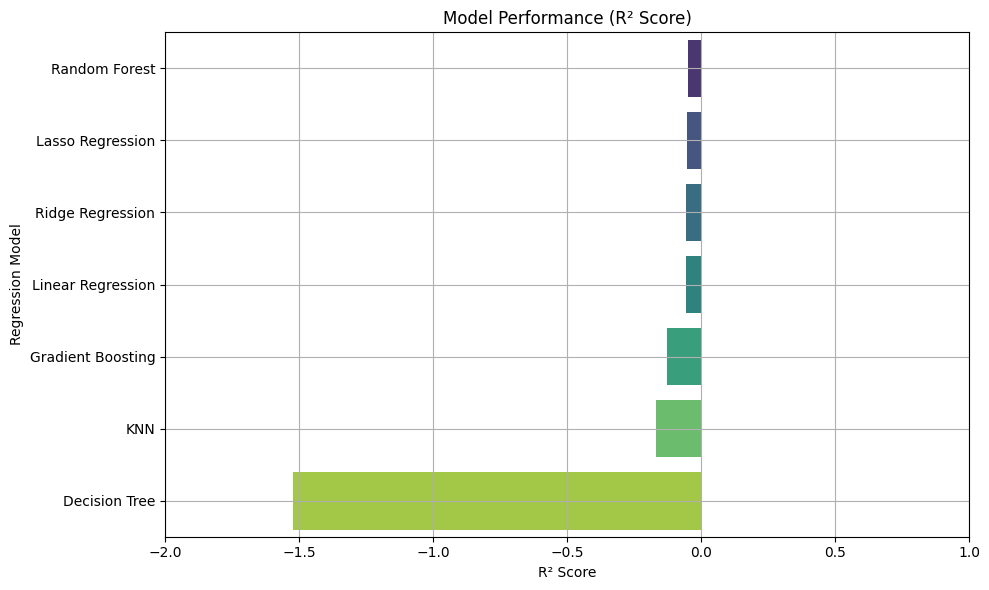

In [32]:
# Collect results here
results = []

# Model summary
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    r2 = r2_score(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)

    print(f"{name}:")
    print(f"R² Score: {r2:.4f}")
    print(f"MSE: {mse:.2f}\n")

    results.append({
        'Model': name,
        'R² Score': r2,
        'MSE': mse
    })

# Create DataFrame
results_df = pd.DataFrame(results).sort_values(by='R² Score', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='R² Score', y='Model', data=results_df, palette='viridis')
plt.title('Model Performance (R² Score)')
plt.xlabel('R² Score')
plt.ylabel('Regression Model')
plt.xlim(-2, 1)
plt.grid(True)
plt.tight_layout()
plt.show()

Summary: The small size of your dataset (500 rows) is likely contributing to the underperformance of the models. This is evident from the plot as ML models, especially more complex ones like Random Forests and Gradient Boosting, tend to perform poorly when trained on small datasets because they struggle to generalize properly without enough data.

The small dataset also show it’s hard for the model to capture the full variability of the data, leading to biased predictions.